## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
%matplotlib inline

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

Data_combined_df = pd.merge(study_results, mouse_metadata, how = "left", on="Mouse ID" )
Data_combined_df.head()
list(Data_combined_df)

['Mouse ID',
 'Timepoint',
 'Tumor Volume (mm3)',
 'Metastatic Sites',
 'Drug Regimen',
 'Sex',
 'Age_months',
 'Weight (g)']

## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


mean = Data_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = Data_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variances = Data_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev = Data_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = Data_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

#DataFrame for Mean,Median,Variance,STD Dev, and SEM of Tumor Volume (TV) by drug Reg.
Sum_Stats_df = pd.DataFrame({"Mean TV": mean, "Median TV": median, 
                           "Variance TV": variances, "Std Dev TV": std_dev, 
                           "SEM TV": sem})
Sum_Stats_df
                   

,Mean TV,Median TV,Variance TV,Std Dev TV,SEM TV
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


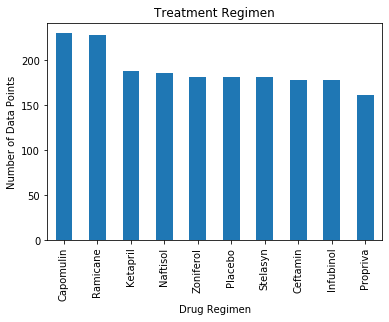

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

counts = Data_combined_df['Drug Regimen'].value_counts()
counts.plot(kind = "bar")
plt.title("Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()


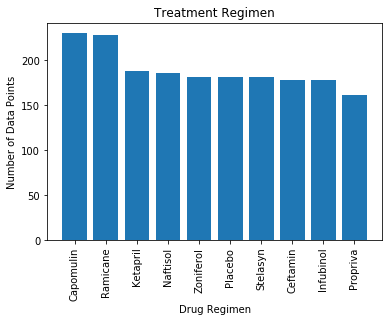

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#counts = Data_combined_df['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values)
plt.title("Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()



## Pie plots

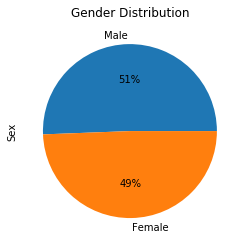

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_counts = Data_combined_df['Sex'].value_counts()
#gender_counts
gender_counts.plot(kind = "pie", autopct="%1.f%%")
plt.title("Gender Distribution")
plt.show()

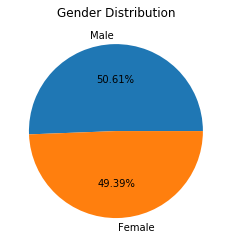

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = Data_combined_df['Sex'].value_counts()
#gender_counts
plt.pie(gender_counts, labels=gender_counts.index, autopct="%.2f%%")
plt.title("Gender Distribution")
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#DataFrame for the four promising treatments 

Prom_treatment = Data_combined_df.loc[Data_combined_df["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]

#FinalTumor volume for each MouseID
Prom_tum_vol = Prom_treatment.groupby(["Mouse ID","Drug Regimen"])["Tumor Volume (mm3)"].last()

#Dataframe of final tumor volume by MouseID
final_tum_vol = pd.DataFrame({"Tumor Volume (mm3)": Prom_tum_vol})
final_tum_vol = final_tum_vol.reset_index()
final_tum_vol

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
...,...,...,...
95,y769,Ceftamin,68.594745
96,y793,Capomulin,31.896238
97,y865,Ceftamin,64.729837
98,z578,Ramicane,30.638696


In [8]:
Capomulin = final_tum_vol.loc[final_tum_vol["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
#Capomulin

In [9]:
Ramicane = final_tum_vol.loc[final_tum_vol["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
#Ramicane

In [10]:
Infubinol = final_tum_vol.loc[final_tum_vol["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
#Infubinol

In [11]:
Ceftamin = final_tum_vol.loc[final_tum_vol["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]
#Ceftamin

In [12]:
quartiles = Capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Capomulin potential outliers: {Capomulin.loc[(Capomulin < lower_bound) | (Capomulin > upper_bound)]}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [13]:
quartiles = Ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Ramicane potential outliers: {Ramicane.loc[(Ramicane < lower_bound) | (Ramicane > upper_bound)]}")


Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [14]:
quartiles = Infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Infubinol potential outliers: {Infubinol.loc[(Infubinol < lower_bound) | (Infubinol > upper_bound)]}")


Infubinol potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [15]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = Ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Ceftamin potential outliers: {Ceftamin.loc[(Ceftamin < lower_bound) | (Ceftamin > upper_bound)]}")



Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


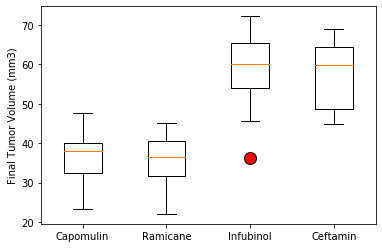

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot([Capomulin,Ramicane,Infubinol,Ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

In [17]:
Capomulin_graph = Data_combined_df.loc[Data_combined_df["Drug Regimen"] =="Capomulin"]
Capomulin_graph = Capomulin_graph.reset_index()
Capomulin_graph.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.0,0,Capomulin,Female,9,22
1,226,j246,0,45.0,0,Capomulin,Female,21,21
2,227,r554,0,45.0,0,Capomulin,Female,8,17
3,228,s185,0,45.0,0,Capomulin,Female,3,17
4,229,b742,0,45.0,0,Capomulin,Male,7,21


In [18]:
mouse_treatment = Capomulin_graph.loc[Capomulin_graph["Mouse ID"] == 'j246']
mouse_treatment

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1,226,j246,0,45.000000,0,Capomulin,Female,21,21
45,451,j246,5,45.641438,0,Capomulin,Female,21,21
73,704,j246,10,46.408361,0,Capomulin,Female,21,21
83,791,j246,15,43.312654,0,Capomulin,Female,21,21
112,1020,j246,20,44.020370,0,Capomulin,Female,21,21
141,1276,j246,25,44.555226,0,Capomulin,Female,21,21
150,1354,j246,30,38.044082,1,Capomulin,Female,21,21
169,1497,j246,35,38.753265,1,Capomulin,Female,21,21


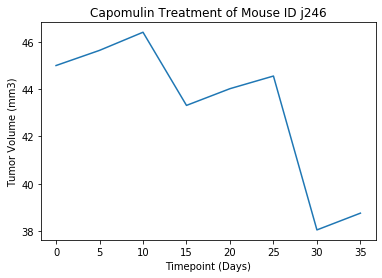

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

plt.plot(mouse_treatment["Timepoint"],mouse_treatment["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse ID j246")
plt.show()

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatt_Capomulin_graph = Capomulin_graph.loc[:,["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
avg_tum_cap = pd.DataFrame(scatt_Capomulin_graph.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_tum_cap.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


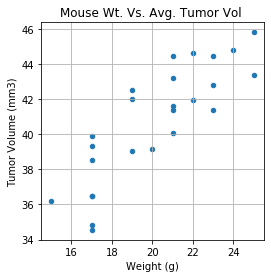

In [21]:
avg_tum_cap.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(4,4),
              title="Mouse Wt. Vs. Avg. Tumor Vol ")


The r-squared is 0.7088568047708717.


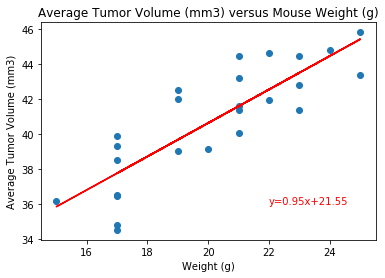

In [22]:
# calculate linear regression modelfor mouse weight and average tumor volume for the Capomulin regimen
# define x and y values to call later
x_values = avg_tum_cap["Weight (g)"]
y_values = avg_tum_cap["Tumor Volume (mm3)"]
# define values using the linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# calculate regress values
regress_values = x_values * slope + intercept
# compose the equation of the best fit line
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
# plot the data for the average tumor volume and weight and apply the best fit line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# add the best fit line
plt.annotate(line_eq,(22,36), fontsize=10, color="red")
# add axes labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume (mm3) versus Mouse Weight (g)")
# calculate the r-squared value and print
r_squared = rvalue**2
print(f"The r-squared is {r_squared}.")

In [23]:
Capomulin_graph.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.0,0,Capomulin,Female,9,22
1,226,j246,0,45.0,0,Capomulin,Female,21,21
2,227,r554,0,45.0,0,Capomulin,Female,8,17
3,228,s185,0,45.0,0,Capomulin,Female,3,17
4,229,b742,0,45.0,0,Capomulin,Male,7,21


In [24]:
avg_tum_cap.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [25]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

mouse_wt = avg_tum_cap.iloc[:,1]
avg_Tum_Vol = avg_tum_cap.iloc[:,2]

CORR = st.pearsonr(mouse_wt,avg_Tum_Vol)

print(f"The CORR between both factors is {round(CORR[0],2)}")


The CORR between both factors is 0.84
